# Predictive Analytics - Penyakit Diabetes ( Kesehatan )

- Nama  : Labiba Adinda Zahwana
- Email : labibaadinda11@gmail.com

1. Deskripsi Project
- Project ini bertujuan untuk membangun model prediksi diagnosis diabetes menggunakan data medis pasien. Model yang dikembangkan berfungsi untuk memprediksi apakah seorang pasien berpotensi mengidap diabetes atau tidak, berdasarkan serangkaian parameter medis dan demografis yang sudah tercatat.
2. Penjelasan Dataset
Dataset ini berasal dari **National Institute of Diabetes and Digestive and Kidney Diseases** dan fokus pada pasien wanita dengan usia minimal 21 tahun dari etnis Pima Indian. Pemilihan subset data ini dilakukan dengan beberapa batasan khusus untuk menjaga konsistensi dan relevansi data.

2.  Variabel dalam Dataset

* Dataset ini tersedia di publik dataset kaggle [Predict Diabetes Dataset - Kaggle](https://www.kaggle.com/datasets/whenamancodes/predict-diabities/data)
* Dataset berbentuk file `.csv` yang berisi beberapa fitur (variabel) medis dan satu variabel target (Outcome).

* **Variabel Independen (Predictor Variables):**
  Variabel ini adalah parameter medis yang digunakan untuk memprediksi kemungkinan diabetes, antara lain:

  * **Pregnancies**: Jumlah kehamilan
  * **Glucose**: Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral
  * **BloodPressure**: Tekanan darah diastolik (mm Hg)
  * **SkinThickness**: Ketebalan lipatan kulit trisep (mm)
  * **Insulin**: Tingkat insulin serum 2 jam (mu U/ml)
  * **BMI**: Indeks massa tubuh (berat dalam kg dibagi kuadrat tinggi dalam meter)
  * **DiabetesPedigreeFunction**: Fungsi pedigree diabetes, sebuah indikator riwayat keluarga diabetes
  * **Age**: Usia pasien (tahun)

* **Variabel Dependen (Target Variable):**

  * **Outcome**: Kategori hasil diagnosis diabetes (0 = tidak diabetes, 1 = diabetes)

## 1. Import Library
Import pustaka yang dibutuhkan untuk load data, EDA, pembangunan model, dan evaluasi nya

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV

## 2. Data Loading

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Exploratory Data Analysis

### 3. 1. Explore dataset
Tahap ini memiliki tujuan untuk mengeksplorasi struktur dan kualitas data yang ada. Proses ini fokus pada beberapa hal utama, yaitu:

* Memeriksa apakah terdapat nilai yang hilang (missing values).

* Mengecek data yang terduplikasi.

* Mengidentifikasi nilai-nilai yang abnormal atau outlier.

* Menilai apakah data sudah layak untuk dianalisis lebih lanjut atau membutuhkan penyesuaian terlebih dahulu.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Hasil Analisis** :

- Hasil dari explorasi dataset menunjukkan bahwa tidak ada missing value dan tidak ada juga data yang duplicated
- Data set terdiri dari 9 variabel dengan 1 variabel target yaitu outcome.
- Dataset terdiri atas 768 baris data yang bertipe integer dan float.
- Selain itu, dengan memanfaatkan fungsi describe(), kita memperoleh ringkasan statistik dari dataset, seperti nilai rata-rata (mean), standar deviasi, nilai minimum, maksimum, serta informasi statistik lainnya.

### 3. 2. Explore distribusi data

C:\Users\Asus\AppData\Local\Temp\ipykernel_22488\2172724031.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=colors)


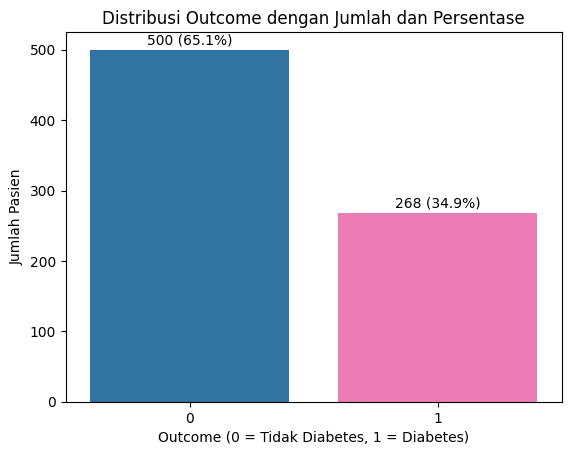

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = df['Outcome'].value_counts()
total = len(df)
percentages = counts / total * 100

colors = ['#1f77b4', '#ff69b4']

sns.barplot(x=counts.index, y=counts.values, palette=colors)
plt.title('Distribusi Outcome dengan Jumlah dan Persentase')
plt.xlabel('Outcome (0 = Tidak Diabetes, 1 = Diabetes)')
plt.ylabel('Jumlah Pasien')

for i, count in enumerate(counts):
    pct = percentages[i]
    plt.text(i, count + total*0.01, f'{count} ({pct:.1f}%)', ha='center')

plt.show()

A. Analisis Distribusi Outcome Dataset Diabetes

* **65,1%** pasien **tidak mengidap diabetes** (Outcome = 0)
* **34,9%** pasien **mengidap diabetes** (Outcome = 1)


B. Implikasi Analisis

1. Distribusi data cukup seimbang meskipun tidak 50:50, proporsi positif diabetes (sekitar sepertiga) sudah cukup representatif untuk pelatihan model klasifikasi. Ini memudahkan model belajar pola kedua kelas dengan baik.

2. Tidak terlalu imbalance, sehingga metode pelatihan standar bisa berjalan tanpa harus menggunakan teknik penanganan imbalance (seperti oversampling atau penalti khusus). Namun, tetap perlu dicek performa model agar tidak bias.

3. Penting untuk evaluasi dengan metrik yang tepat, seperti AUC-ROC, F1-score, selain akurasi, untuk memastikan model mampu memprediksi kedua kelas secara seimbang.

4. Distribusi ini juga menggambarkan kondisi populasi pasien wanita Pima Indian dalam dataset, di mana hampir sepertiga berpotensi mengidap diabetes, informasi penting bagi analisis epidemiologi dan intervensi medis.



**Histogram untuk kolom numerik di Data Frame**

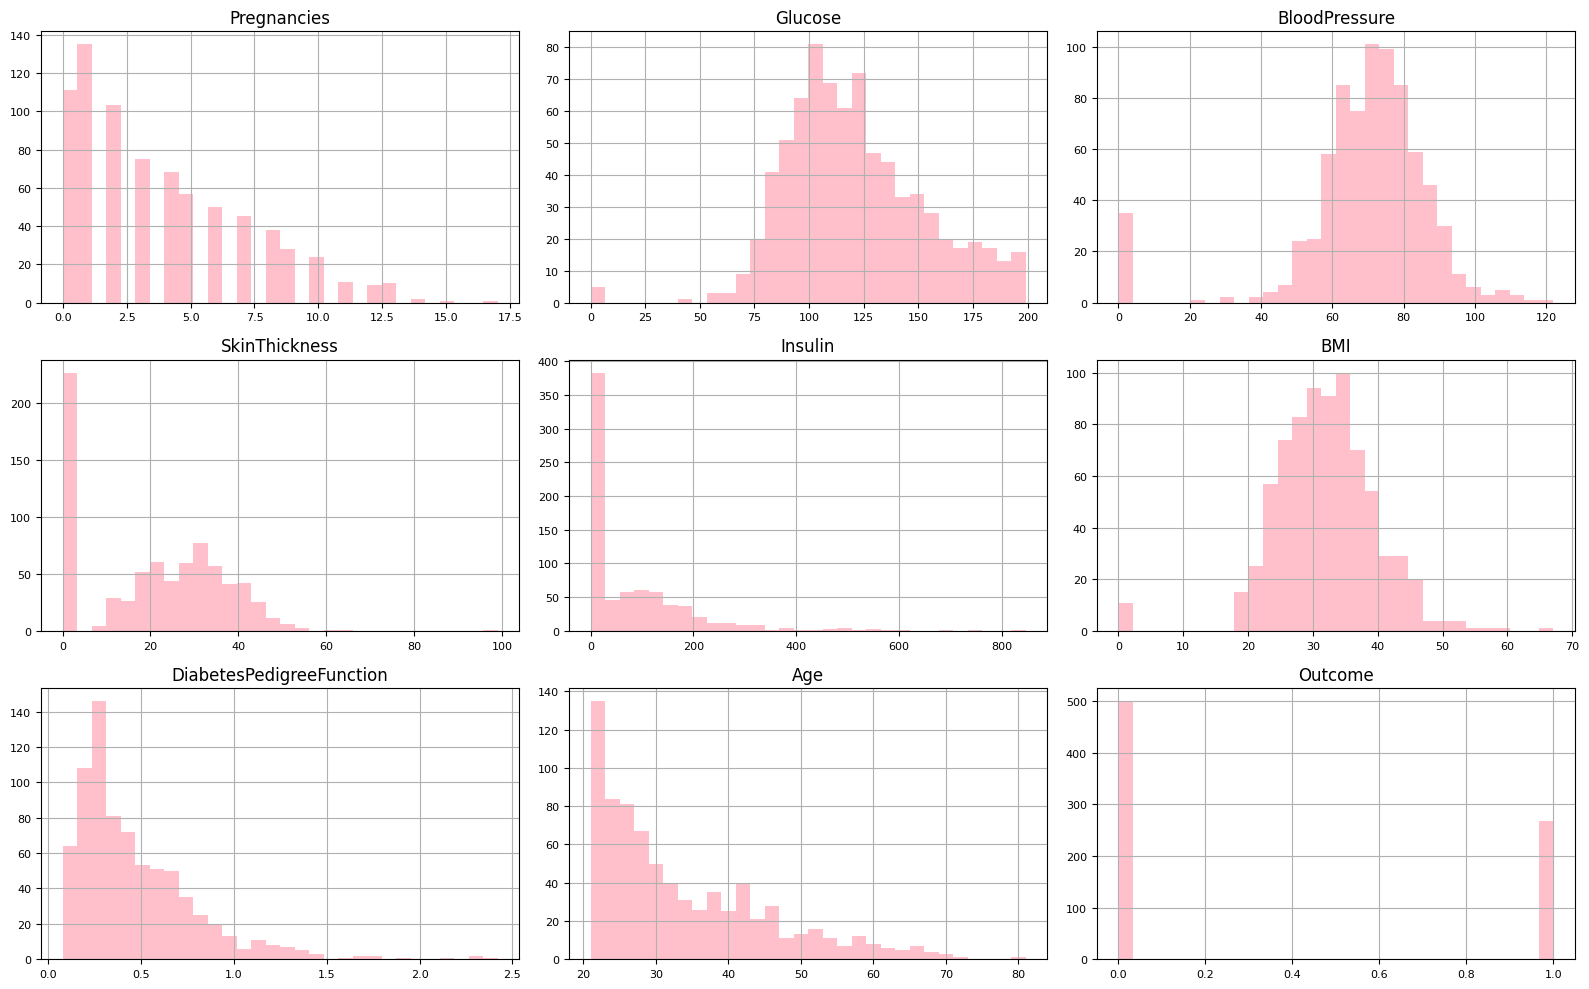

In [8]:
# Filter kolom numerik saja
col_numerik = df.select_dtypes(include=['float64', 'int64']).columns

# Buat figure dan axes dengan 3 baris dan 3 kolom
fig, axes = plt.subplots(3, 3, figsize=(16, 10))

# Flatten axes supaya bisa di-loop dengan mudah
axes = axes.flatten()

# Plot histogram tiap kolom numerik dengan warna pink
for i, col in enumerate(col_numerik):
    df[col].hist(ax=axes[i], bins=30, color='pink')  # warna pink
    axes[i].set_title(col)
    axes[i].tick_params(axis='both', labelsize=8)

# Hapus axes kosong jika kolom numerik kurang dari 9
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Analisis grafik hist plot :

1. Pregnancies

* Distribusi menunjukkan sebagian besar pasien memiliki jumlah kehamilan rendah, terutama antara 0 sampai 5 kali.
* Ada penurunan frekuensi signifikan pada jumlah kehamilan lebih dari 5, dan sangat sedikit pasien dengan kehamilan lebih dari 10.


2. Glucose

* Data glukosa plasma tersebar normal dengan puncak di sekitar 100-120 mg/dL.
* Ada nilai ekstrem di bagian kanan (nilai glukosa sangat tinggi) yang bisa jadi indikator risiko diabetes.
* Sebagian kecil pasien memiliki kadar glukosa rendah.

3. BloodPressure

* Tekanan darah sebagian besar berkisar di 60-90 mm Hg, dengan puncak sekitar 60-70.
* Distribusi cenderung normal tapi ada outlier di nilai tinggi (>100).

4. SkinThickness

* Mayoritas data berada di rentang 0-40 mm.
* Terdapat banyak nilai 0 yang juga kemungkinan data hilang atau tidak tercatat.
* Distribusi agak miring ke kanan dengan beberapa nilai ekstrim tinggi.

5. Insulin

* Sebagian besar data berkonsentrasi di nilai rendah, dengan puncak di dekat 0, ada banyak nol yang perlu diperiksa.
* Sebagian kecil nilai sangat tinggi (lebih dari 400), menunjukkan distribusi yang sangat miring ke kanan (skewed).

6. BMI

* Distribusi BMI berkisar antara 20 sampai 40 dengan puncak sekitar 30-35, yang termasuk kategori overweight hingga obesitas.
* Ada beberapa nilai nol yang tidak wajar, perlu diperiksa.
* Ini menunjukkan sebagian besar pasien memiliki BMI di atas normal.

7. DiabetesPedigreeFunction

* Nilai fungsi pedigree berkisar rendah, sebagian besar di bawah 1.0, dengan beberapa nilai sampai 2.5.
* Distribusi miring ke kanan, artinya sebagian kecil pasien punya riwayat keluarga diabetes yang tinggi.

8. Age

* Sebagian besar pasien berusia 20-40 tahun, dengan penurunan jumlah pasien di usia lebih tua.
* Ada rentang usia sampai 80 tahun.
* Distribusi ini cukup representatif populasi dewasa muda dan paruh baya.

9. Outcome

* Distribusi target cukup seimbang dengan lebih banyak pasien negatif diabetes (0) dibanding positif (1).
* Jumlah pasien dengan Outcome=0 sekitar dua kali lipat dari Outcome=1, konsisten dengan analisis distribusi sebelumnya.


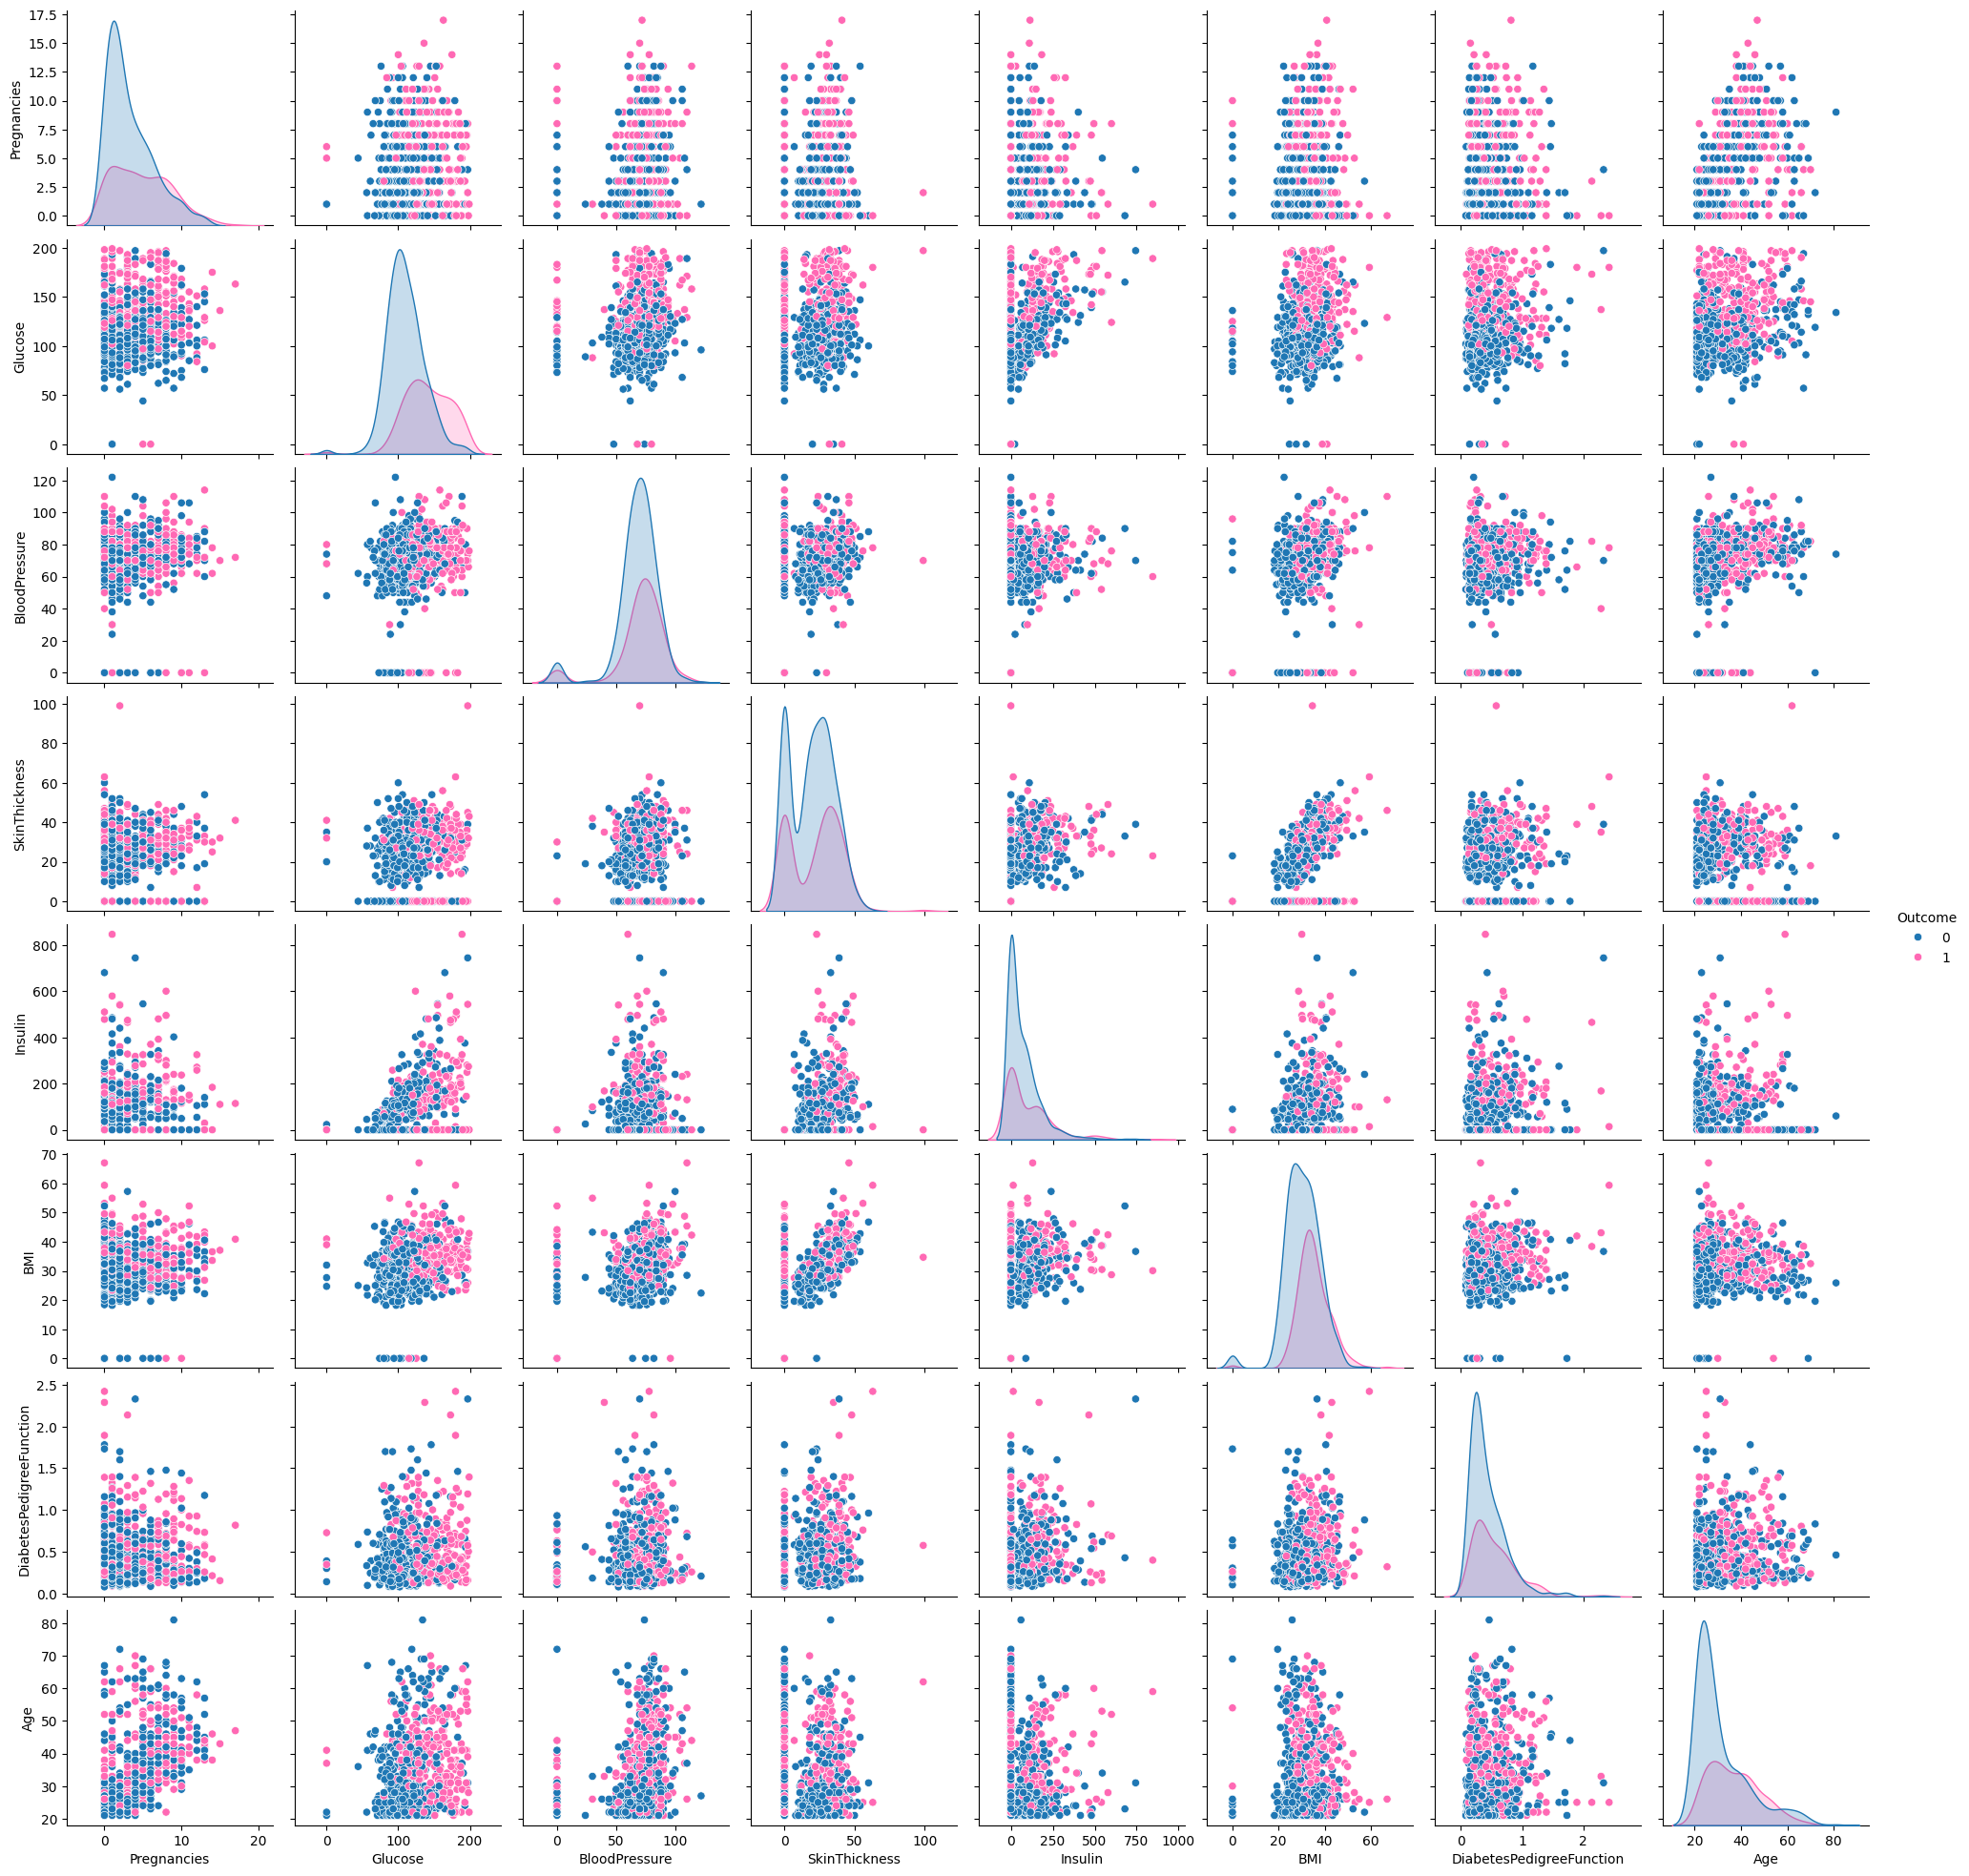

In [9]:
# Definisikan palette warna untuk Outcome 0 dan 1
# 1 pink, 0 biru
palette_colors = {0: '#1f77b4', 1: '#ff69b4'}  # pink dan biru

sns.pairplot(df, hue="Outcome", palette=palette_colors)
plt.show()

**Korelasi data dengan heatmap**

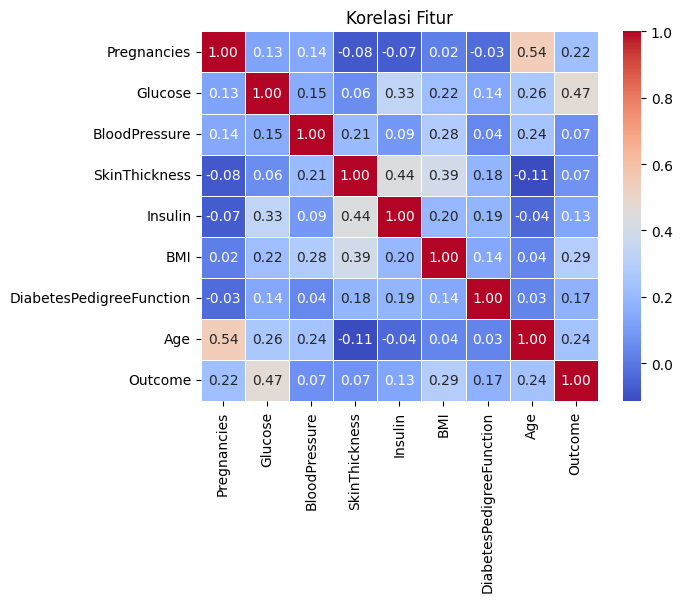

In [10]:
cm = df.corr()
sns.heatmap(cm, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Korelasi Fitur')
plt.show()

**Analisis Korelasi Fitur Dataset Diabetes**
1. Korelasi dengan Outcome (Target)

* **Glucose (0.47)**
  Memiliki korelasi positif sedang yang paling tinggi dengan Outcome. Artinya, semakin tinggi kadar glukosa, semakin besar kemungkinan pasien mengidap diabetes.

* **BMI (0.29)**
  Korelasi positif sedang, menandakan BMI yang lebih tinggi berhubungan dengan risiko diabetes lebih besar.

* **Age (0.24)**
  Usia juga berkorelasi positif, menunjukkan pasien yang lebih tua cenderung lebih berisiko diabetes.

* **Pregnancies (0.22)**
  Jumlah kehamilan menunjukkan korelasi positif lemah sampai sedang dengan diabetes.

* **DiabetesPedigreeFunction (0.17)**
  Korelasi positif rendah, menunjukkan riwayat keluarga diabetes sedikit berpengaruh.

* **Insulin (0.13), BloodPressure (0.07), SkinThickness (0.07)**
  Korelasi yang sangat lemah sampai hampir netral terhadap Outcome.


2. Korelasi Antar Fitur

* **Pregnancies & Age (0.54)**
  Korelasi positif sedang sampai kuat, artinya wanita yang lebih tua biasanya pernah mengalami lebih banyak kehamilan.

* **Insulin & SkinThickness (0.44)**
  Korelasi positif sedang, keduanya terkait karena ketebalan kulit dan kadar insulin berkaitan dengan fungsi metabolisme dan resistensi insulin.

* **BMI & SkinThickness (0.39)**
  Korelasi positif sedang, keduanya berhubungan dengan lemak tubuh.

* **Glucose & Insulin (0.33)**
  Korelasi positif sedang, logis karena kadar insulin dan glukosa saling berhubungan dalam metabolisme gula darah.

* Korelasi antar fitur lain sebagian besar rendah hingga sedang, menunjukkan fitur relatif independen satu sama lain.


**Insight**

* Fitur **Glucose**, **BMI**, **Age**, dan **Pregnancies** adalah predictor paling signifikan untuk diabetes pada dataset ini.
* Beberapa fitur seperti **Insulin**, **SkinThickness**, dan **BloodPressure** memiliki korelasi rendah terhadap target, tapi mungkin tetap berguna dalam model kompleks.
* Korelasi antar fitur tidak terlalu tinggi (tidak ada multikolinearitas kuat), sehingga fitur-fitur tersebut bisa digunakan bersamaan tanpa banyak redundansi.


**Detect Outlier dengan IQR**

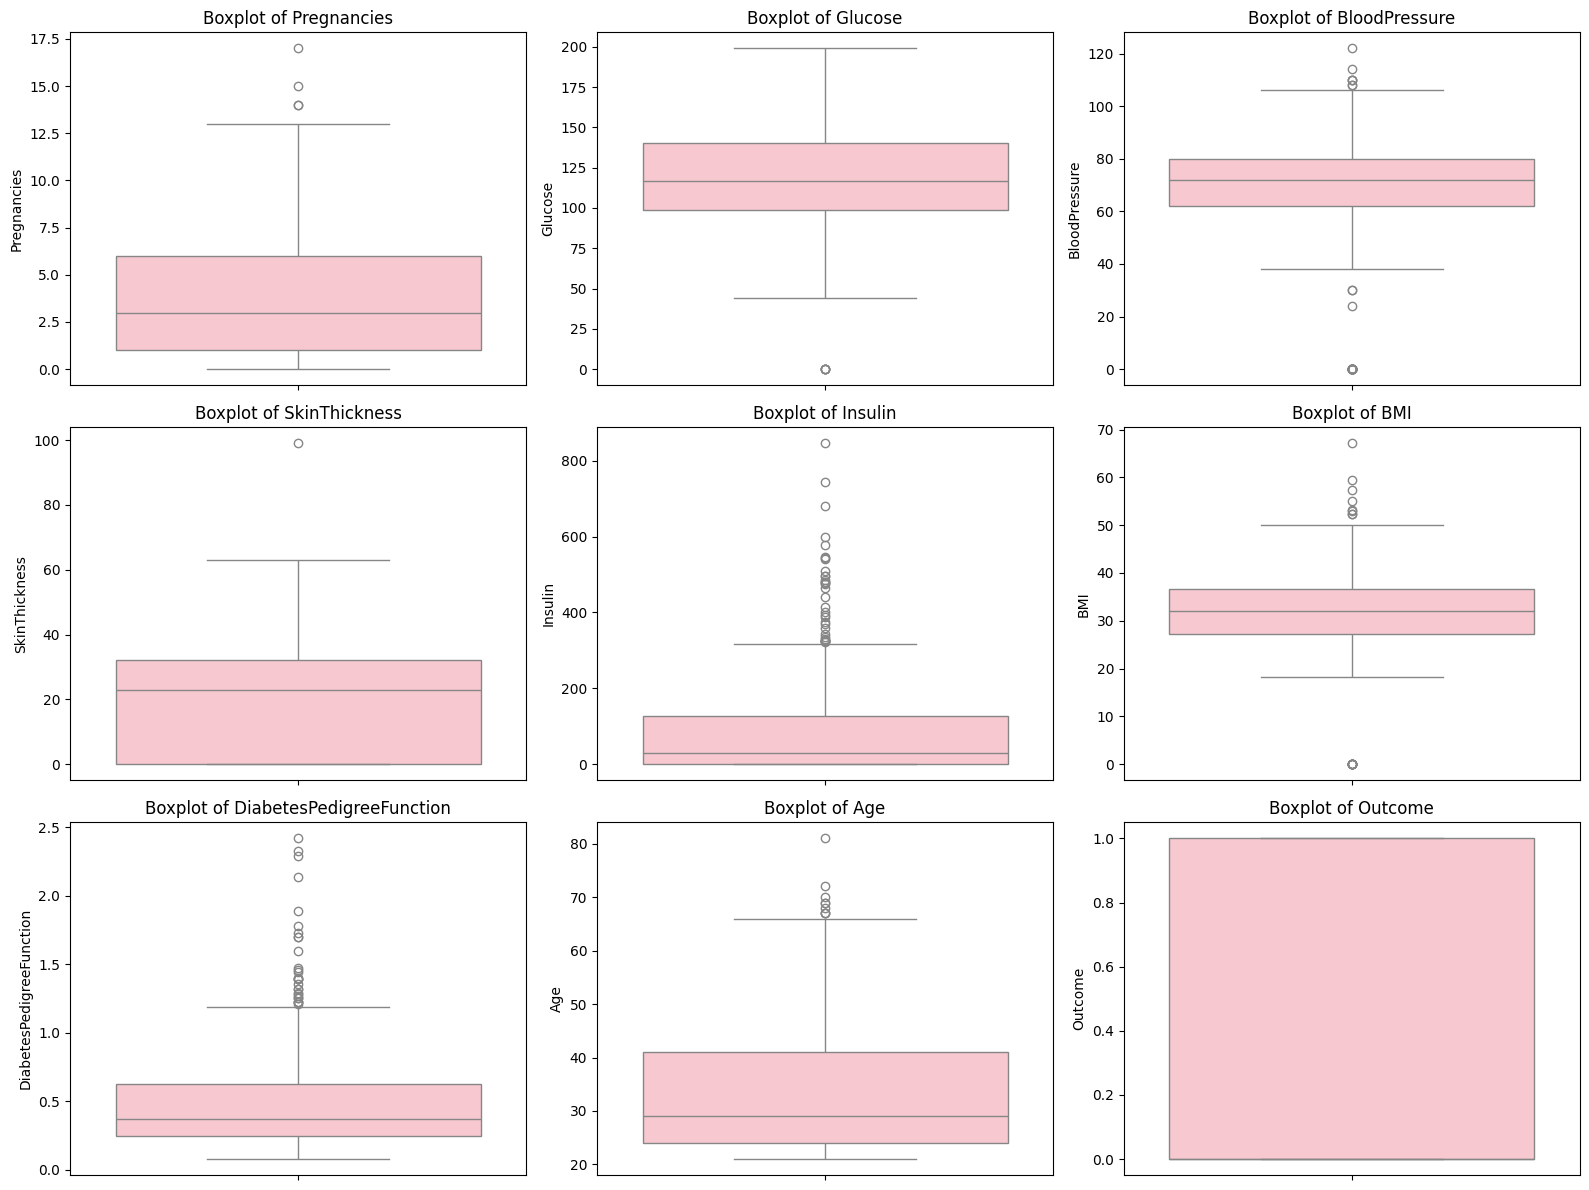

In [11]:
plt.figure(figsize=(16,12))

for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column], color='pink')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Analisis boxplot tiap fitur:

* **Pregnancies:** Sebagian besar di bawah 6, ada beberapa outlier tinggi.
* **Glucose:** Mayoritas normal, tapi ada nilai nol dan outlier tinggi.
* **BloodPressure:** Banyak nilai nol yang tidak valid, ada outlier tinggi.
* **SkinThickness:** Sebagian besar rendah, ada outlier ekstrem.
* **Insulin:** Banyak outlier sangat tinggi, distribusi sangat miring.
* **BMI:** Mayoritas di kisaran overweight, ada nilai nol dan outlier tinggi.
* **DiabetesPedigreeFunction:** Sebagian besar kecil, ada outlier tinggi.
* **Age:** Sebagian besar 20-40 tahun, ada outlier usia lanjut.
* **Outcome:** Variabel biner, tidak ada outlier.



## 4. Data Preparation

### 4. 1. Data Preprocessing

**Outlier Handling**

In [12]:
def handle_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Clip nilai ke batas bawah dan atas (winsorizing)
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Pilih kolom numerik untuk ditangani outliernya (kecuali Outcome)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Outcome')

df = handle_outliers_iqr(df, numerical_cols)

print("Penanganan outlier selesai.")

Penanganan outlier selesai.


**Plot setelah Outlier Handling**

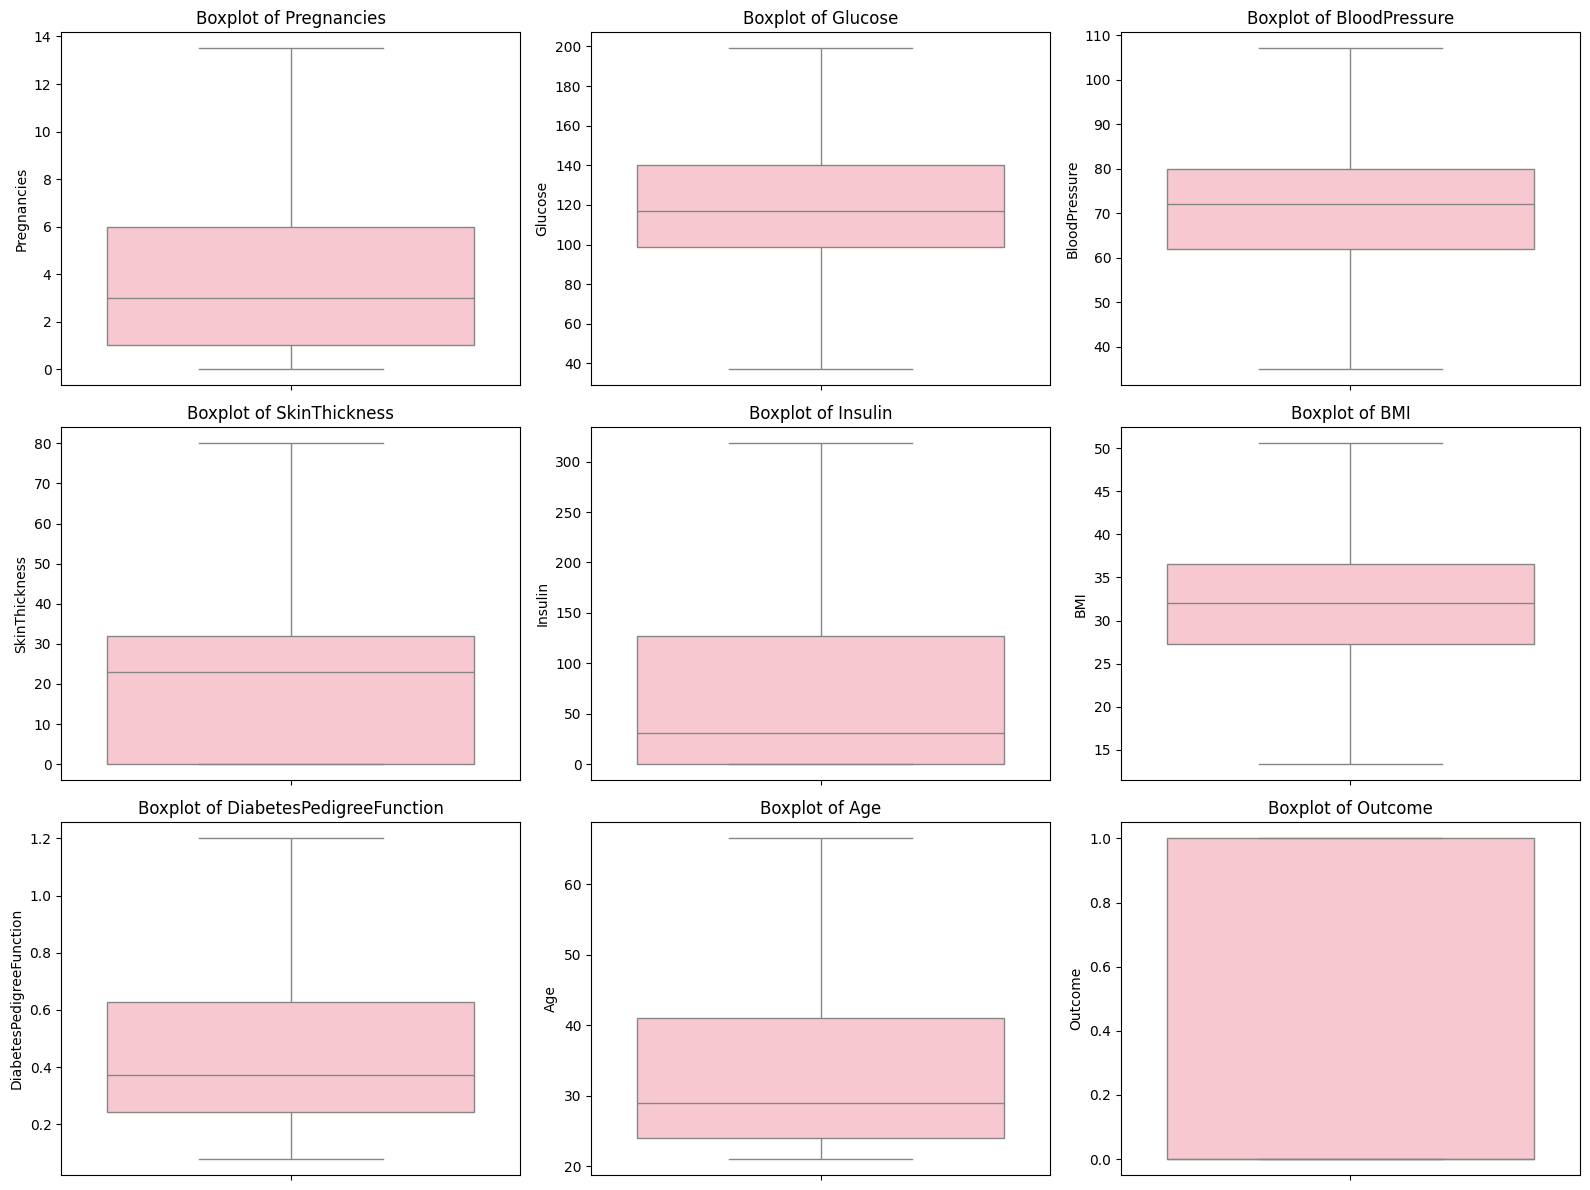

In [13]:
plt.figure(figsize=(16,12))

for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column], color='pink')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Berhasil handling outlier terlihat sudah tidak ada outlier lagi

**Imbalance Data Handling dengan metode SMOTE**

In [14]:
# drop fitur yang y nya
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# apply smote method
def apply_smote(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

X_resampled, y_resampled = apply_smote(X, y)

class_distribution = y_resampled.value_counts()
print("Distribusi kelas setelah oversampling:")
print(class_distribution)

Distribusi kelas setelah oversampling:
Outcome
1    500
0    500
Name: count, dtype: int64


C:\Program Files\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


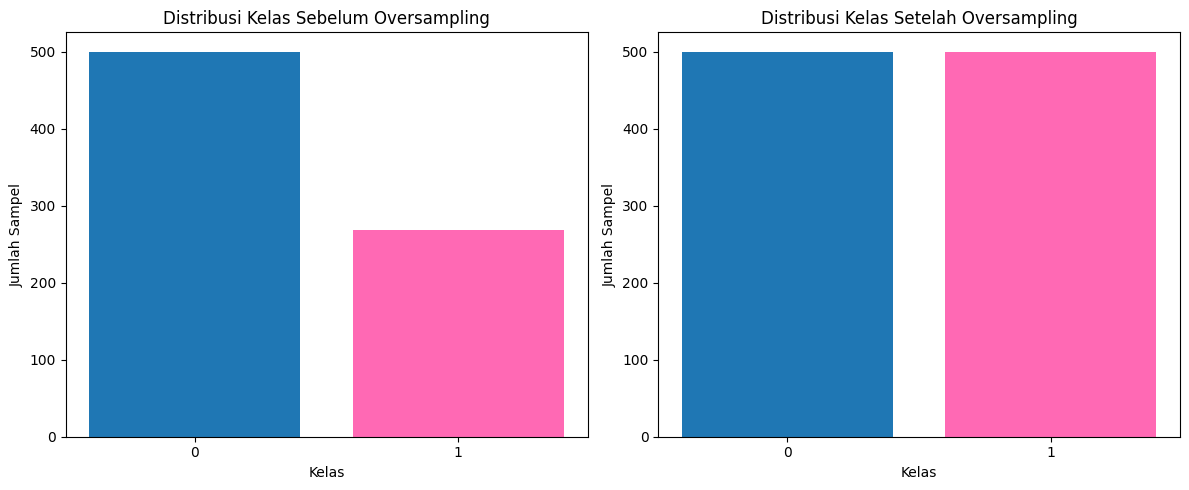

In [63]:
# Hitung distribusi kelas sebelum oversampling
counter_before = Counter(y)

# Di cell sebelumnya sudah dilakukan oversampling dengan SMOTE -> X_resampled, y_resampled
# Hitung distribusi kelas setelah oversampling
counter_after = Counter(y_resampled) # sudah dilakukan oversampling dengan SMOTE

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Warna: kelas 0 pink, kelas 1 biru (ditukar dari sebelumnya)
colors = ['#ff69b4', '#1f77b4']

# Plot sebelum oversampling
bars_before = axes[0].bar(counter_before.keys(), counter_before.values(), color=colors)
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah Sampel')
axes[0].set_title('Distribusi Kelas Sebelum Oversampling')
axes[0].set_xticks(list(counter_before.keys()))



# Plot setelah oversampling
bars_after = axes[1].bar(counter_after.keys(), counter_after.values(), color=colors)
axes[1].set_xlabel('Kelas')
axes[1].set_ylabel('Jumlah Sampel')
axes[1].set_title('Distribusi Kelas Setelah Oversampling')
axes[1].set_xticks(list(counter_after.keys()))

plt.tight_layout()
plt.show()


Data yang tidak seimbang (imbalanced data) telah berhasil ditangani, data sekarang sudah seimbang antara kelas 0 dan 1. 

### 4. 2. **Data Splitting**

Setelah melakukan beberapa percobaan (sebelumnya menggunakan pembagian 80:20), pada kasus ini dataset akan dibagi dengan rasio 70:30, yakni 70% untuk data pelatihan dan 30% untuk data pengujian.

Data yang di split adalah data yang telah dilakukan proses SMOTE yaitu **X_resampled, y_resampled**

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print("Data Latih (Train):", X_train.shape)
print("Data Uji (Test):", X_test.shape)

Data Latih (Train): (700, 8)
Data Uji (Test): (300, 8)


### 4. 3. Standardisasi

Sebelum membangun model machine learning, dilakukan proses standardisasi terlebih dahulu. Tahap ini bertujuan untuk mengubah fitur numerik dalam data sehingga memiliki nilai rata-rata nol dan standar deviasi satu.

In [65]:
num_pipeline = Pipeline([('std_scaler', StandardScaler())])
X_train_prepared = num_pipeline.fit_transform(X_train)
X_test_prepared = num_pipeline.transform(X_test)

telah dilakukan standardisasi pada dataset X (inputan)
**kenapa yang dilakukan hanya terhadap dataset inputan?**
1. Target Y tidak diproses dikarenakan target (label/output) sudah dalam skala yang tepat yaitu 0 (tidak diabetes) atau 1 (diabetes)
2. Model belajar dari pola fitur inputan, standardisasi ini tujuannya agar semua fitur inputan memiliki skala yang sama, sehingga model tidak bias terhadap fitur dengan rentang yang lebih besar.
3. Target Y itu perannya beda. Target itu adalah outout yang ingin diprediksi, bukan input yang diproses model secara langsung.


**Artinya** yang akan diproses -> X_train_prepared, X_test_prepared, y_train, y_test

## 5. Model Development

Pada tahap ini akan mengembangkan model machine learning dengan 5 algoritma
1. **Random Forest**  
Algoritma ensemble learning yang menggabungkan banyak pohon keputusan (decision trees) untuk meningkatkan akurasi prediksi. Model ini dilatih dengan parameter utama seperti jumlah pohon (*n\_estimators*), kedalaman maksimum pohon (*max\_depth*), dan jumlah fitur maksimum yang dipertimbangkan (*max\_features*).

2. **XGBoost**
  Algoritma boosting yang memanfaatkan gradient boosting untuk membangun model klasifikasi dengan performa tinggi. Digunakan untuk menangani data dengan kompleksitas tinggi dan fitur yang beragam.

3. **Logistic Regression**
  Model regresi yang digunakan untuk prediksi probabilitas kelas biner, dalam hal ini prediksi status diabetes atau tidak.

4. **K-Nearest Neighbors (KNN)**
  Algoritma non-parametrik yang mengklasifikasikan data berdasarkan kedekatan jarak ke tetangga terdekat.

5. **Support Vector Machine (SVM)**
  Algoritma yang mencari hyperplane terbaik untuk memisahkan kelas dengan margin maksimal, digunakan dengan kernel radial basis function (RBF) untuk menangani data non-linear.


### 5. 1. Model Random Forest

In [44]:
# Inisialisasi model Random Forest dengan parameter tertentu
random_forest_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    max_features='sqrt',
    random_state=42
)

# Melatih model dengan data training
random_forest_model.fit(X_train_prepared, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

**Penjelasan Model Random Forest**
- Random Forest membangun banyak pohon keputusan secara acak dan menggabungkan hasilnya untuk meningkatkan akurasi dan ketahanan terhadap overfitting.

- Parameter n_estimators=50 memilih jumlah pohon yang cukup untuk performa baik dan efisiensi waktu.

- max_depth=5 membatasi kompleksitas tiap pohon agar tidak terlalu spesifik ke data training (menghindari overfitting).

- max_features='sqrt' meningkatkan variasi antar pohon, membuat ensemble lebih kuat.

- random_state=42 menjamin hasil yang konsisten agar eksperimen dapat diulang.

### 5. 2. Model XGBoost

In [45]:
# Inisialisaasi model xgboost 
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# melatih model dengan data training
xgb_model.fit(X_train_prepared, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

**Penjelasan Model XGBoost**
- XGBClassifier adalah implementasi dari algoritma gradient boosting yang sangat populer dan powerful, khususnya untuk data dengan fitur kompleks dan non-linear. Model ini membangun banyak weak learners (biasanya decision trees dangkal) secara berurutan untuk memperbaiki kesalahan model sebelumnya.
- n_estimators=100 adalah Jumlah total boosting rounds atau jumlah pohon keputusan yang akan dibangun secara berurutan. Semakin banyak estimator, model bisa belajar lebih baik tapi risiko overfitting meningkat dan waktu training lebih lama. 100 adalah nilai yang umum dipakai sebagai starting point.
- max_depth=5 membatasi kompleksitas tiap pohon untuk menghindari overfitting.
- use_label_encoder=False dan eval_metric='logloss' menyesuaikan dengan versi XGBoost terbaru dan memastikan evaluasi yang tepat selama training.
- random_state=42 menjaga konsistensi hasil eksperimen.


### 5. 3. Model Logistic Regression

In [46]:
logreg_model = LogisticRegression(
    max_iter=1000,
    random_state=42
)
logreg_model.fit(X_train_prepared, y_train)

LogisticRegression(max_iter=1000, random_state=42)

**Penjelasan Model Logistic Regression**
- LogisticRegression adalah model statistik yang digunakan untuk klasifikasi biner dengan memprediksi probabilitas suatu kejadian berdasarkan fungsi logit. Model ini mengestimasi hubungan antara variabel independen dan probabilitas target kelas.
- Parameter max_iter=1000 digunakan untuk memastikan model mencapai konvergensi terutama pada dataset kompleks.
- random_state=42 menjaga reproducibility hasil eksperimen.

### 5. 4. Model K-Nearest Neighbors (KNN)

In [47]:
knn_model = KNeighborsClassifier(
    n_neighbors=5
)
knn_model.fit(X_train_prepared, y_train)

KNeighborsClassifier()

**Penjelasan Model KNN**
- KNeighborsClassifier adalah algoritma non-parametrik yang mengklasifikasikan data berdasarkan kemiripan jarak dengan data tetangga terdekat di ruang fitur.
- Parameter n_neighbors=5 menentukan seberapa banyak tetangga yang diperhitungkan, memengaruhi bias dan varians model. Nilai 5 adalah pilihan umum yang seimbang antara sensitivitas dan kestabilan prediksi.
- KNN cocok untuk dataset kecil sampai menengah dan memiliki interpretasi mudah, tapi bisa lambat untuk dataset besar karena harus menghitung jarak ke seluruh data saat prediksi.

### 5. 5. Model Support Vector Machine (SVM)

In [48]:
svm_model = SVC(
    probability=True,
    random_state=42
)
svm_model.fit(X_train_prepared, y_train)

SVC(probability=True, random_state=42)

**Penjelasan Model SVM**
- SVC (Support Vector Classifier) adalah implementasi algoritma Support Vector Machine untuk klasifikasi. Algoritma SVM mencari hyperplane optimal yang memisahkan kelas dengan margin maksimum untuk meningkatkan generalisasi.
- `probability=True` Mengaktifkan estimasi probabilitas untuk prediksi kelas menggunakan metode Platt scaling. Proses ini menambah waktu training karena SVM harus menjalankan cross-validation internal.
- `random_state=42` Mengatur seed random agar hasil training konsisten dan dapat direproduksi.

## 6. Evaluation

Bikin dulu **fungsi** supaya lebih gampang saat evaluasi modelnya. Fungsi ini gunanya mengumpulkan instruksi agar kode menjadi lebih terstruktur dan terhindar dari pengulangan penulisan kode (prinsip DRY code).

In [66]:
# buat fungsi agar lebih efisien tinggal manggil fungsi as instruction 
# fungai ini untuk evaluasi tiap model nya
def evaluate_model(model, X, y, data_type="Test"):
    classes = y.unique()
    preds = model.predict(X)

    report = classification_report(y, preds)
    accuracy = accuracy_score(y, preds) * 100
    cm = confusion_matrix(y, preds)

    plt.figure(figsize=(4, 2))
    sns.heatmap(
        cm,
        annot=True,
        cmap='Blues',
        fmt='g',
        xticklabels=[f'Predicted {c}' for c in classes],
        yticklabels=[f'Actual {c}' for c in classes]
    )

    print(f"{data_type} Accuracy Score: {accuracy:.2f}%")
    print(f"CLASSIFICATION REPORT:\n{report}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({data_type})')
    plt.show()


**Penjelasan Fungsi Evaluate Model** : Fungsi `evaluate_model` digunakan untuk mengevaluasi performa model ML dengan:

* Memprediksi kelas dari data input.
* Menghitung akurasi dan classification report (precision, recall, f1-score).
* Membuat confusion matrix dan menampilkannya sebagai heatmap.
* Menampilkan hasil evaluasi dan plot dengan label sesuai data (`Train` atau `Test`).
* Fungsi ini bertujuan untuk memudahkan evaluasi model secara cepat dan lengkap cukup dengan satu panggilan fungsi.

Evaluasi ini akan dibandingan antara train data dengan test data
- train data : X_train_prepared, y_train
- test data  : X_test_prepared, y_test

In [67]:
# Sebelum ke evaluasi model print dlu jumlah nya, biar lebih clear untuk detail penjelasan documentationnya

print("Jumlah data train:", X_train_prepared.shape[0])  
print("Jumlah data test:", X_test_prepared.shape[0])    
print("Jumlah label train:", len(y_train))    
print("Jumlah label test:", len(y_test))      

Jumlah data train: 700
Jumlah data test: 300
Jumlah label train: 700
Jumlah label test: 300


### 6. 1. Evaluation Model Random Forest

Train Accuracy Score: 88.00%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.91      0.84      0.88       351
           1       0.85      0.92      0.88       349

    accuracy                           0.88       700
   macro avg       0.88      0.88      0.88       700
weighted avg       0.88      0.88      0.88       700



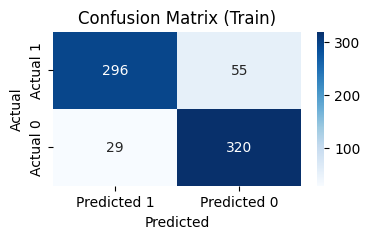

Test Accuracy Score: 75.67%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       149
           1       0.73      0.81      0.77       151

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



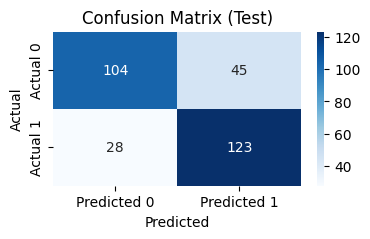

In [68]:
evaluate_model(random_forest_model, X_train_prepared, y_train, data_type="Train")
evaluate_model(random_forest_model, X_test_prepared, y_test, data_type="Test")

Evaluasi **model Random Forest** :

**Train Evaluation**

* Akurasi: 88.00% Model memiliki akurasi yang cukup baik pada data training.
* Precision kelas 0: 0.91 Dari semua prediksi kelas 0, 91% benar.
* Recall kelas 0: 0.84 Dari seluruh data kelas 0 sebenarnya, model mendeteksi 84% dengan benar.
* F1-score kelas 0: 0.88 Performa yang seimbang dan baik untuk kelas 0.
* Precision kelas 1: 0.85 Dari prediksi kelas 1, 85% akurat.
* Recall kelas 1: 0.92 Hampir semua data kelas 1 (92%) terdeteksi dengan baik.
* F1-score kelas 1: 0.88 Performanya juga baik untuk kelas 1.
* Kesimpulan: Model bekerja baik pada data training, namun ada indikasi kemungkinan overfitting karena performa yang cukup tinggi.

**Test Evaluation**

* Akurasi: 75.67% Turun signifikan dibanding data training, menunjukkan model kurang mampu menggeneralisasi ke data baru.
* Precision kelas 0: 0.79 Masih cukup baik dalam memprediksi kelas 0 pada data test.
* Recall kelas 0: 0.70 Model mendeteksi sebagian besar kelas 0 tapi ada beberapa yang terlewat.
* F1-score kelas 0: 0.74 Performanya cukup untuk kelas 0.
* Precision kelas 1: 0.73 Prediksi kelas 1 kurang akurat dibanding kelas 0.
* Recall kelas 1: 0.81 Model berhasil mendeteksi 81% data kelas 1 pada data test.
* F1-score kelas 1: 0.77 Masih cukup baik, tapi ada ruang untuk peningkatan.
* Kesimpulan: Model mengalami penurunan performa yang cukup signifikan pada data test, terutama pada kelas minoritas (kelas 1), menandakan kemungkinan overfitting. 


**Evaluasi Model Random Forest**

Model Random Forest menunjukkan performa yang cukup baik pada data training dengan akurasi tinggi 88.00%. Namun, terjadi penurunan performa pada data test menjadi 75.67%, yang menunjukkan model kurang mampu menggeneralisasi data baru secara optimal. Hal ini bisa disebabkan overfitting pada data training. 


### 6. 2. Evaluation Model XGBoost

Train Accuracy Score: 99.14%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       351
           1       0.99      0.99      0.99       349

    accuracy                           0.99       700
   macro avg       0.99      0.99      0.99       700
weighted avg       0.99      0.99      0.99       700



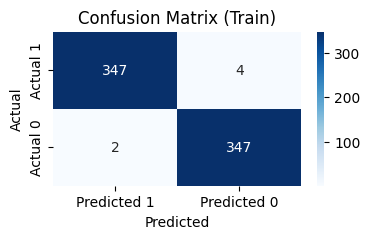

Test Accuracy Score: 76.00%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.80      0.68      0.74       149
           1       0.73      0.83      0.78       151

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300



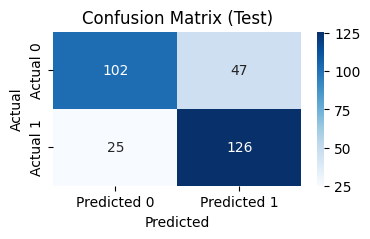

In [72]:
evaluate_model(xgb_model, X_train_prepared, y_train, data_type="Train")
evaluate_model(xgb_model, X_test_prepared, y_test, data_type="Test")

Evaluasi **model XGBoost**:

**Train Evaluation**

* Akurasi: 99.14% Model sangat akurat pada data training, hampir tanpa kesalahan.
* Precision kelas 0: 0.99 Dari semua prediksi kelas 0, 99% benar.
* Recall kelas 0: 0.99 Dari seluruh data kelas 0 sebenarnya, model mendeteksi 99% dengan benar.
* F1-score kelas 0: 0.99 Performa sangat sempurna untuk kelas 0.
* Precision kelas 1: 0.99 Dari prediksi kelas 1, 99% akurat.
* Recall kelas 1: 0.99 Hampir semua data kelas 1 terdeteksi dengan baik.
* F1-score kelas 1: 0.99 Sangat tinggi, performa kelas 1 juga sangat baik.
* Kesimpulan: Model sangat fit pada data training, indikasi overfitting.

**Test Evaluation**

* Akurasi: 76.00% Turun signifikan dibanding data training, menunjukkan model kurang mampu menggeneralisasi.
* Precision kelas 0: 0.80 Masih cukup baik dalam memprediksi kelas 0 di data test.
* Recall kelas 0: 0.68 Model mendeteksi sebagian besar kelas 0 tapi ada beberapa yang terlewat.
* F1-score kelas 0: 0.74 Performanya cukup baik untuk kelas 0.
* Precision kelas 1: 0.73 Prediksi kelas 1 kurang akurat dibanding kelas 0.
* Recall kelas 1: 0.83 Model berhasil mendeteksi 83% data kelas 1 pada test data.
* F1-score kelas 1: 0.78 Cukup, tapi masih bisa ditingkatkan.

**Evaluasi Model**

Model XGBoost menunjukkan performa yang sangat baik pada data training dengan akurasi dan metrik kelas hampir sempurna, tetapi mengalami penurunan performa yang cukup signifikan pada data test. Hal ini menandakan model mengalami overfitting, yaitu terlalu "menghafal" data training sehingga kurang mampu menggeneralisasi data baru. Penurunan performa terutama terjadi pada kelas minoritas (kelas 1).

### 6. 3. Evaluation Model Logistic Regression

Train Accuracy Score: 74.71%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       351
           1       0.76      0.72      0.74       349

    accuracy                           0.75       700
   macro avg       0.75      0.75      0.75       700
weighted avg       0.75      0.75      0.75       700



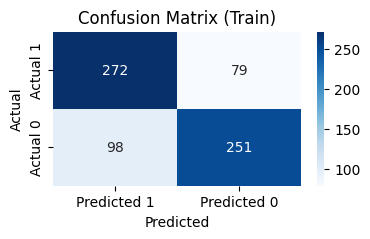

Test Accuracy Score: 74.67%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       149
           1       0.75      0.74      0.75       151

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



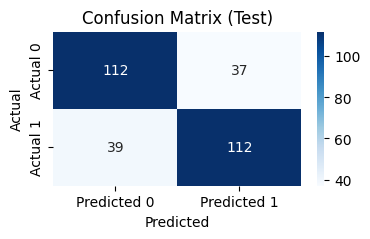

In [52]:
evaluate_model(logreg_model, X_train_prepared, y_train, data_type="Train")
evaluate_model(logreg_model, X_test_prepared, y_test, data_type="Test")

Evaluasi **model Logistic Regression** :

**Train Evaluation**

* Akurasi: 74.71% Model menunjukkan performa stabil pada data training.
* Precision kelas 0: 0.74 Dari semua prediksi kelas 0, 74% benar.
* Recall kelas 0: 0.77 Dari seluruh data kelas 0 sebenarnya, model berhasil mendeteksi 77%.
* F1-score kelas 0: 0.75 Performa cukup baik untuk kelas 0 dengan keseimbangan precision dan recall.
* Precision kelas 1: 0.76 Dari prediksi kelas 1, 76% akurat.
* Recall kelas 1: 0.72 Model berhasil mendeteksi 72% data kelas 1.
* F1-score kelas 1: 0.74 Performa cukup seimbang untuk kelas 1.
* **Kesimpulan:** Model memberikan performa yang stabil pada data training dengan akurasi sedang.


**Test Evaluation**

* Akurasi: 74.67% Performa pada data test hampir sama dengan data training, menandakan model mampu generalisasi dengan baik.
* Precision kelas 0: 0.74 Prediksi kelas 0 cukup akurat pada data test.
* Recall kelas 0: 0.75 Model mendeteksi 75% data kelas 0 dengan baik.
* F1-score kelas 0: 0.75 Performa seimbang dan stabil untuk kelas 0.
* Precision kelas 1: 0.75 Prediksi kelas 1 juga cukup akurat.
* Recall kelas 1: 0.74 Model berhasil mendeteksi 74% data kelas 1.
* F1-score kelas 1: 0.75 Performa yang seimbang untuk kelas 1.
* **Kesimpulan:** Model menunjukkan kemampuan generalisasi yang baik, performa pada data test hampir setara dengan data training.

**Evaluasi Model**

Model Logistic Regression ini memiliki performa yang konsisten antara data training dan data test, dengan akurasi dan metrik kelas yang seimbang. Hal ini menunjukkan model mampu menggeneralisasi dengan baik dan tidak mengalami overfitting yang signifikan.


### 6. 4. Evaluation Model K-Nearest Neighbors (KNN)

Train Accuracy Score: 84.86%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       351
           1       0.81      0.90      0.86       349

    accuracy                           0.85       700
   macro avg       0.85      0.85      0.85       700
weighted avg       0.85      0.85      0.85       700



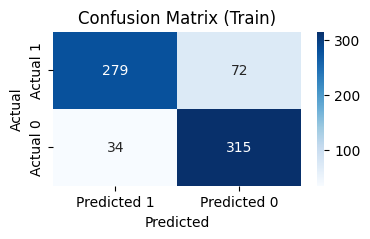

Test Accuracy Score: 76.00%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       149
           1       0.73      0.82      0.78       151

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



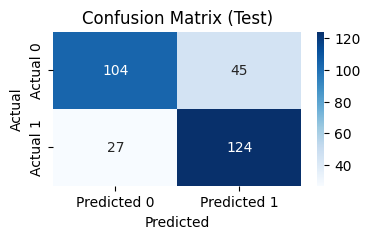

In [53]:
evaluate_model(knn_model, X_train_prepared, y_train, data_type="Train")
evaluate_model(knn_model, X_test_prepared, y_test, data_type="Test")

Evaluasi **model K-Nearest Neighbors (KNN)**:

**Train Evaluation**

* Akurasi: 84.86% Model memiliki performa yang cukup baik pada data training.
* Precision kelas 0: 0.89 Dari semua prediksi kelas 0, 89% benar.
* Recall kelas 0: 0.79 Dari seluruh data kelas 0 sebenarnya, model berhasil mendeteksi 79%.
* F1-score kelas 0: 0.84 Performa yang cukup baik untuk kelas 0.
* Precision kelas 1: 0.81 Dari prediksi kelas 1, 81% akurat.
* Recall kelas 1: 0.90 Hampir semua data kelas 1 terdeteksi dengan baik (90%).
* F1-score kelas 1: 0.86 Performanya sangat baik untuk kelas 1.
* Kesimpulan: Model menunjukkan performa cukup baik pada data training dengan keseimbangan antara precision dan recall.

**Test Evaluation**

* Akurasi: 76.00% Penurunan akurasi pada data test dibandingkan training, menunjukkan penurunan kemampuan generalisasi.
* Precision kelas 0: 0.79 Prediksi kelas 0 cukup akurat pada data test.
* Recall kelas 0: 0.70 Model berhasil mendeteksi 70% data kelas 0 pada test.
* F1-score kelas 0: 0.74 Performa sedang untuk kelas 0 pada data test.
* Precision kelas 1: 0.73 Prediksi kelas 1 kurang akurat dibanding kelas 0.
* Recall kelas 1: 0.82 Model mendeteksi 82% data kelas 1 dengan baik.
* F1-score kelas 1: 0.78 Performa cukup baik untuk kelas 1 di data test.
* Kesimpulan: Model mengalami penurunan performa pada data test, terutama pada kelas 0. Diperlukan optimasi untuk meningkatkan kemampuan generalisasi model.


**Evaluasi Model**

Model KNN menunjukkan performa yang baik pada data training dengan akurasi dan metrik kelas yang cukup tinggi. Namun, performa menurun pada data test, mengindikasikan model kurang mampu menggeneralisasi pola pada data baru secara optimal. Penurunan performa terutama terjadi pada kelas 0.


### 6. 5. Evaluation Model Support Vector Machine (SVM)

Train Accuracy Score: 85.00%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       351
           1       0.84      0.87      0.85       349

    accuracy                           0.85       700
   macro avg       0.85      0.85      0.85       700
weighted avg       0.85      0.85      0.85       700



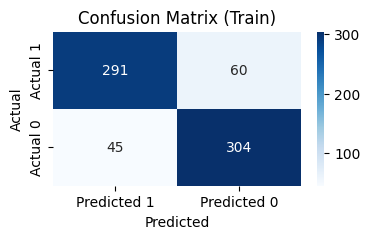

Test Accuracy Score: 78.00%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       149
           1       0.76      0.82      0.79       151

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



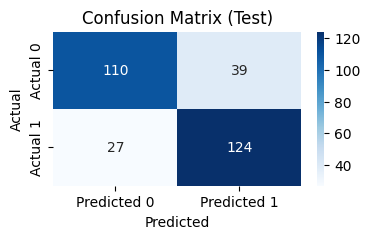

In [54]:
evaluate_model(svm_model, X_train_prepared, y_train, data_type="Train")
evaluate_model(svm_model, X_test_prepared, y_test, data_type="Test")

Evaluasi **model Support Vector Machine (SVM)**:

**Train Evaluation**

* Akurasi: 85.00% Model menunjukkan performa baik pada data training.
* Precision kelas 0: 0.87 Dari semua prediksi kelas 0, 87% benar.
* Recall kelas 0: 0.83 Dari seluruh data kelas 0 sebenarnya, model mendeteksi 83%.
* F1-score kelas 0: 0.85 Performa yang seimbang dan baik untuk kelas 0.
* Precision kelas 1: 0.84 Dari prediksi kelas 1, 84% akurat.
* Recall kelas 1: 0.87 Model berhasil mendeteksi 87% data kelas 1.
* F1-score kelas 1: 0.85 Performa seimbang untuk kelas 1.
* Kesimpulan: Model menunjukkan performa yang baik dan seimbang pada data training.

**Test Evaluation**

* Akurasi: 78.00% Penurunan performa pada data test dibandingkan data training, namun masih menunjukkan generalisasi yang cukup baik.
* Precision kelas 0: 0.80 Prediksi kelas 0 cukup akurat pada data test.
* Recall kelas 0: 0.74 Model mendeteksi 74% data kelas 0 pada data test.
* F1-score kelas 0: 0.77 Performa baik untuk kelas 0 di data test.
* Precision kelas 1: 0.76 Prediksi kelas 1 cukup akurat.
* Recall kelas 1: 0.82 Model berhasil mendeteksi 82% data kelas 1 pada test.
* F1-score kelas 1: 0.79 Performa baik dan sedikit lebih tinggi pada kelas 1.
* Kesimpulan: Model SVM cukup baik dalam menggeneralisasi ke data test dengan penurunan performa yang tidak terlalu signifikan.


**Evaluasi Model**

Model Support Vector Machine (SVM) menunjukkan performa yang cukup baik dan seimbang pada data training dan data test. Model ini memiliki kemampuan generalisasi yang lebih baik dibandingkan beberapa model lain, dengan akurasi test yang masih cukup tinggi yaitu 78%. Meski ada penurunan performa dibanding data training, model tetap stabil dan mampu mendeteksi kedua kelas dengan baik.

## 7. Kesimpulan

Setelah model dan evaluasi ini dibuat, akan dilakukan komparasi terhadap setiap model yang digunakan. Tujuan nya agar mengetahui model yang tepat untuk digunakannya itu yang mana nya jadi tau

In [70]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

models = {
    "Random Forest": random_forest_model,
    "XGBoost": xgb_model,
    "Logistic Regression": logreg_model,
    "KNN": knn_model,
    "SVM": svm_model
}

best_model_name = None
best_auc = 0
best_model = None

for name, model in models.items():
    model.fit(X_train_prepared, y_train)
    y_pred = model.predict(X_test_prepared)
    y_proba = None

    # Untuk ROC AUC kita butuh probabilitas prediksi
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_prepared)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test_prepared)
    else:
        print(f"{name} tidak mendukung prediksi probabilitas, AUC tidak dihitung.")

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print(f"\nModel: {name}")
    print(f"Accuracy : {acc:.4f}")
    print(f"F1-Score : {f1:.4f}")
    if auc is not None:
        print(f"AUC-ROC  : {auc:.4f}")
    else:
        print("AUC-ROC  : Tidak tersedia")

    # Pilih model terbaik berdasarkan AUC
    if auc is not None and auc > best_auc:
        best_auc = auc
        best_model_name = name
        best_model = model

print(f"\nBest model berdasarkan AUC: {best_model_name} dengan skor {best_auc:.4f}")



Model: Random Forest
Accuracy : 0.7567
F1-Score : 0.7712
AUC-ROC  : 0.8375

Model: XGBoost
Accuracy : 0.7600
F1-Score : 0.7778
AUC-ROC  : 0.8215

Model: Logistic Regression
Accuracy : 0.7467
F1-Score : 0.7467
AUC-ROC  : 0.8453

Model: KNN
Accuracy : 0.7600
F1-Score : 0.7750
AUC-ROC  : 0.8372

Model: SVM
Accuracy : 0.7800
F1-Score : 0.7898
AUC-ROC  : 0.8443

Best model berdasarkan AUC: Logistic Regression dengan skor 0.8453


Berikut tabel perbandingan performa beberapa model beserta penjelasannya:

| Model                        | Accuracy | F1-Score | AUC-ROC |
| ---------------------------- | -------- | -------- | ------- |
| Random Forest                | 0.7567   | 0.7712   | 0.8375  |
| XGBoost                      | 0.7600   | 0.7778   | 0.8215  |
| Logistic Regression          | 0.7467   | 0.7467   | 0.8453  |
| K-Nearest Neighbors (KNN)    | 0.7600   | 0.7750   | 0.8372  |
| Support Vector Machine (SVM) | 0.7800   | 0.7898   | 0.8443  |


**Penjelasan:**

* **Accuracy** mengukur proporsi prediksi yang benar dari keseluruhan data.
* **F1-Score** adalah harmonic mean dari precision dan recall, penting untuk dataset tidak seimbang.
* **AUC-ROC** mengukur kemampuan model membedakan kelas positif dan negatif; semakin tinggi, semakin baik.


**Analisis:**

* **Logistic Regression** unggul berdasarkan nilai **AUC-ROC tertinggi (0.8453)**, yang menunjukkan kemampuan terbaik dalam membedakan pasien dengan dan tanpa diabetes secara keseluruhan. Meskipun akurasi (0.7467) dan F1-score (0.7467) sedikit lebih rendah dibanding model lain, keunggulan AUC-ROC menjadikannya pilihan utama terutama bila interpretabilitas juga dipertimbangkan.

* **Support Vector Machine (SVM)** memiliki akurasi tertinggi (0.7800) dan F1-score terbaik (0.7898), namun AUC-ROC-nya sedikit di bawah Logistic Regression (0.8443), sehingga performanya cukup kompetitif namun perlu tuning untuk lebih optimal.

* **Random Forest** dan **KNN** memiliki performa cukup baik dengan AUC-ROC di kisaran 0.83-an, namun masih di bawah Logistic Regression dan SVM.

* **XGBoost** memiliki F1-score tertinggi (0.7778), menunjukkan keefektifan dalam menangani ketidakseimbangan kelas, namun AUC-ROC-nya (0.8215) paling rendah di antara model-model tersebut.


**Hubungan dengan Business Understanding**

* Menjawab Problem Statement:
  Model Logistic Regression mampu memprediksi penyakit diabetes mellitus dengan baik, menjawab kebutuhan prediksi yang akurat dari problem statement.

* Mencapai Goals:
  Dengan akurasi dan AUC tinggi, model ini memenuhi tujuan pengembangan model efektif serta evaluasi performa yang memadai.


**Kesimpulan**

> Berdasarkan metrik **AUC-ROC**, model terbaik adalah **Logistic Regression** dengan skor 0.8453, meskipun SVM menunjukkan akurasi dan F1-Score yang lebih tinggi. Pemilihan model akhir bisa mempertimbangkan kebutuhan spesifik seperti keseimbangan precision-recall atau interpretabilitas.
> Model ini memberikan dampak signifikan dalam konteks bisnis dan medis dengan meningkatkan akurasi prediksi penyakit diabetes serta mendukung strategi pencegahan dan penanganan yang lebih baik.
